In [1]:
import pickle
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [27]:
from regressors import *

In [ ]:
regression_based_outlier_detection

In [25]:
metadata

array([['Århus', 57.05, 10.33],
       ['Çorlu', 40.99, 27.69],
       ['Çorum', 40.99, 34.08],
       ...,
       ['Zurich', 47.42, 8.29],
       ['Zuwarah', 32.95, 12.45],
       ['Zwolle', 52.24, 5.26]], dtype=object)

In [41]:
n_stations = len(metadata)
time_length = 1000

In [8]:
import numpy as np

In [9]:
import random 

In [16]:
n_stations = 10000
time_length = 1000

In [17]:
def regression_based_outlier_detection(ts_data, neighbor, station, n_regressors = 3, n_variables = 3, eps=1) :
    result = np.array([], dtype='int')
    for i in range(n_regressors) : 
        idx = random.choices(neighbor[station],k=n_variables)
        y = ts_data[station] 
        X = ts_data[idx]
        reg = LinearRegression().fit(X.T, y)
#         print(reg.score(X.T, y))
        original = ts_data[station]
        predict = reg.intercept_ + np.dot(X.T, reg.coef_)
#         print(abs(predict - original))
        ix = np.where(abs(predict - original) > eps)
#         print(ix)
        result = np.append(result, ix)
#         print(result)

    unique, counts = np.unique(result, return_counts=True)
    RESULT = dict(zip(unique, counts))
#     print(RESULT)
    return {k: v for k, v in sorted(RESULT.items(), key=lambda item: item[1]) if v>n_regressors/2}

    
    

In [18]:
#random data creation 
ts_data = np.zeros((n_stations, time_length))
lst_failed_station = []
ANSWER = []
s = random.choice(range(20,30,1))
for time_step in range(time_length) :        
    temperature = random.choice(range(s-3,s+3,1))
    val = temperature + np.random.rand(n_stations)    
    #add random noise with 10% prop
    if random.random() < 0.20 : 
        failed_station = random.choice(range(n_stations))
        noise = random.random() * 20
        sign = random.choice([-1,1])
        
        val[failed_station] = val[failed_station] + noise * sign 
#         print(failed_station, time_step, "\t", sign, "\t", noise)
        
        lst_failed_station.append([failed_station, time_step, sign * noise])
        ANSWER.append(str(failed_station) + '_'+ str(time_step))
    
    ts_data[:,time_step] = val
# print(len(lst_failed_station))
    

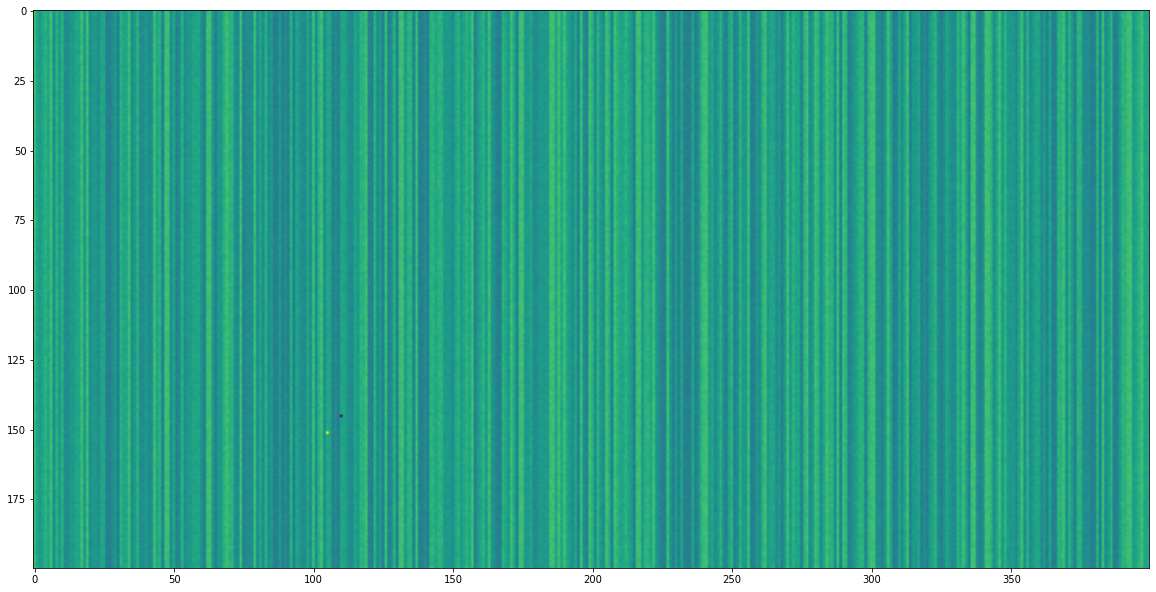

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(ts_data[:200,:400])

In [21]:
len(lst_failed_station)

178

In [22]:
metadata_location = metadata[:,1:]
k=10
dist_matrix = distance_matrix(metadata_location,metadata_location)
neighbor = dist_matrix.argsort()[:, 1:k+1]

In [23]:
lst_failed_station

[[8245, 3, 18.941182806309293],
 [5469, 11, -3.6803358099098604],
 [8406, 12, 14.908323350289205],
 [3106, 16, -1.5043251530273793],
 [6406, 19, -13.915051748375154],
 [7291, 20, 2.2308240933485735],
 [5074, 21, -11.736054160609992],
 [2503, 28, -9.84429383786473],
 [8100, 35, 10.80634540584385],
 [6664, 37, -16.9621306020314],
 [9167, 45, 4.795449160489451],
 [2994, 48, 6.791287833797681],
 [3615, 66, -14.54140865851836],
 [5201, 75, 2.0014462753621154],
 [298, 76, 8.465638343386313],
 [5651, 79, 5.580606065139461],
 [5315, 81, 1.3738020894798408],
 [7745, 82, 18.98416360170042],
 [4192, 83, -12.137823762685429],
 [1196, 97, -12.845966873089758],
 [8303, 101, 3.2209982220477684],
 [151, 105, 8.23641994905686],
 [145, 110, -11.111079178439931],
 [6586, 111, 9.00717465947084],
 [7671, 114, 17.182731688104358],
 [6609, 120, -5.400574036504291],
 [7567, 122, -10.702326184767855],
 [3767, 132, 13.859076553797731],
 [8262, 141, 13.89815680270379],
 [9662, 148, 15.985975936429034],
 [4438, 1

In [386]:
metadata

array([['Århus', 57.05, 10.33],
       ['Çorlu', 40.99, 27.69],
       ['Çorum', 40.99, 34.08],
       ...,
       ['Zurich', 47.42, 8.29],
       ['Zuwarah', 32.95, 12.45],
       ['Zwolle', 52.24, 5.26]], dtype=object)

In [24]:
while True : 
    i = random.choice(range(n_stations))
    result = regression_based_outlier_detection(ts_data, neighbor, station=i, n_regressors = 10, n_variables = 3, eps=2)
    if len(result) > 0 : 
        print(i, result)
        print(lst_failed_station[i])
        break
    
y = lst_failed_station[i][0]
plt.figure()
plt.imshow(ts_data[i-3:i+4, y-5: y+6])


IndexError: index 7996 is out of bounds for axis 0 with size 3510

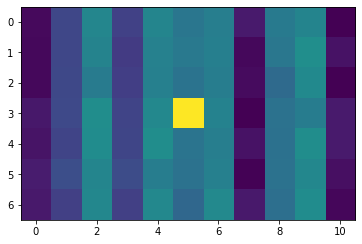

In [376]:
len(ANSWER) / 

88

In [377]:
88 / 3510000

2.5071225071225073e-05

In [375]:
ts_data.shape[0] * ts_data.shape[1]

3510000

In [352]:
RESULT = []
for i in range(n_stations) : 
    result = regression_based_outlier_detection(ts_data, neighbor, station=i, n_regressors = 5, n_variables = 2, eps=2)
    if len(result) > 0  :
        RESULT.append(str(i) + '_'+ str(list(result.keys())[0]))


In [358]:
false_positive=0
for r in RESULT : 
    if r not in ANSWER : 
        false_positive+=1
false_negative = 0
for a in ANSWER : 
    if a not in RESULT : 
        false_negative+=1

        
print(false_positive,n_stations)
print(false_negative,n_stations)

22 3510
9 3510


In [363]:
RESULT = []
for i in range(n_stations) : 
    result = regression_based_outlier_detection(ts_data, neighbor, station=i, n_regressors = 5, n_variables = 2, eps=3)
    if len(result) > 0  :
        RESULT.append(str(i) + '_'+ str(list(result.keys())[0]))


In [364]:
false_positive=0
for r in RESULT : 
    if r not in ANSWER : 
        false_positive+=1
false_negative = 0
for a in ANSWER : 
    if a not in RESULT : 
        false_negative+=1

        
print(false_positive,n_stations)
print(false_negative,n_stations)

14 3510
14 3510


In [371]:
ANSWER[3] in RESULT

True